In [2]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [4]:
df1 = pd.read_csv('EDA_df.csv')
df1.head()

,Unnamed: 0,Subject Age Group,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,0,Unknown,Arrest,None,7500,1980s,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,N,N
1,1,Unknown,Field Contact,None,5670,1960s,M,White,Unknown,Unknown,2015-03-19T00:00:00,07:59:00,N,N
2,3,Unknown,Field Contact,None,7539,1960s,M,White,Unknown,Unknown,2015-04-01T00:00:00,04:55:00,N,N
3,4,Unknown,Field Contact,None,6973,1970s,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,N,N
4,5,Unknown,Field Contact,None,7402,1970s,M,White,Black or African American,Male,2015-04-05T00:00:00,23:46:00,N,N


In [5]:
target = df1['Arrest Flag']
predictors = df1.drop(columns = ['Arrest Flag'], axis = 1)

In [6]:
target.replace({"N": 0, "Y": 1}, inplace=True)
predictors['Frisk Flag'].replace({"N": 0, "Y": 1}, inplace=True)

In [7]:
dummy_predictors = pd.get_dummies(predictors, drop_first=False)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dummy_predictors, target, random_state=11)

In [9]:
classifier = DecisionTreeClassifier(random_state=11)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=11)

In [10]:
y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

In [11]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC is :{0}'.format(round(roc_auc, 2)))

AUC is :0.99


In [12]:
def model_eval(YTrain, YTest, YHat_Train, YHat_Test):
    PrecisionTrain = precision_score(YTrain, YHat_Train)
    PrecisionTest = precision_score(YTest, YHat_Test)
    RecallTrain = recall_score(YTrain, YHat_Train)
    RecallTest = recall_score(YTest, YHat_Test)
    AccuracyTrain = accuracy_score(YTrain, YHat_Train)
    AccuracyTest = accuracy_score(YTest, YHat_Test)
    F1Train = f1_score(YTrain, YHat_Train)
    F1Test = f1_score(YTest, YHat_Test)
    print('Precision Score:\nTrain: {}  Test: {}\nRecall Score:\nTrain: {}  Test {}\nAccuracy Score:\nTrain: {}  Test: {}\nF1 Score:\nTrain: {}  Test: {}'.format(
                                                    PrecisionTrain, PrecisionTest, RecallTrain, RecallTest, 
                                                    AccuracyTrain, AccuracyTest, F1Train, F1Test))

In [13]:
model_eval(y_train, y_test, y_pred_train, y_pred_test)

Precision Score:
Train: 1.0  Test: 0.9969183359013868
Recall Score:
Train: 1.0  Test 0.9892966360856269
Accuracy Score:
Train: 1.0  Test: 0.9991973602069028
F1 Score:
Train: 1.0  Test: 0.9930928626247123


In [15]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[10557,     2],
       [    7,   647]], dtype=int64)

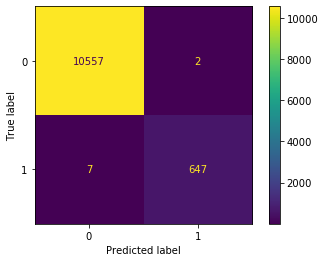

In [17]:
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [18]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_10 <= 0.50
|   |--- feature_2342 <= 0.50
|   |   |--- feature_8148 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_8148 >  0.50
|   |   |   |--- class: 1
|   |--- feature_2342 >  0.50
|   |   |--- class: 1
|--- feature_10 >  0.50
|   |--- feature_15 <= 0.50
|   |   |--- feature_27 <= 0.50
|   |   |   |--- feature_18 <= 0.50
|   |   |   |   |--- feature_23 <= 0.50
|   |   |   |   |   |--- feature_1 <= 8651.50
|   |   |   |   |   |   |--- feature_22 <= 0.50
|   |   |   |   |   |   |   |--- feature_32 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_26 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_35 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_29 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_29 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_35 >  0.50
|   |   |   |   |   |   |   |

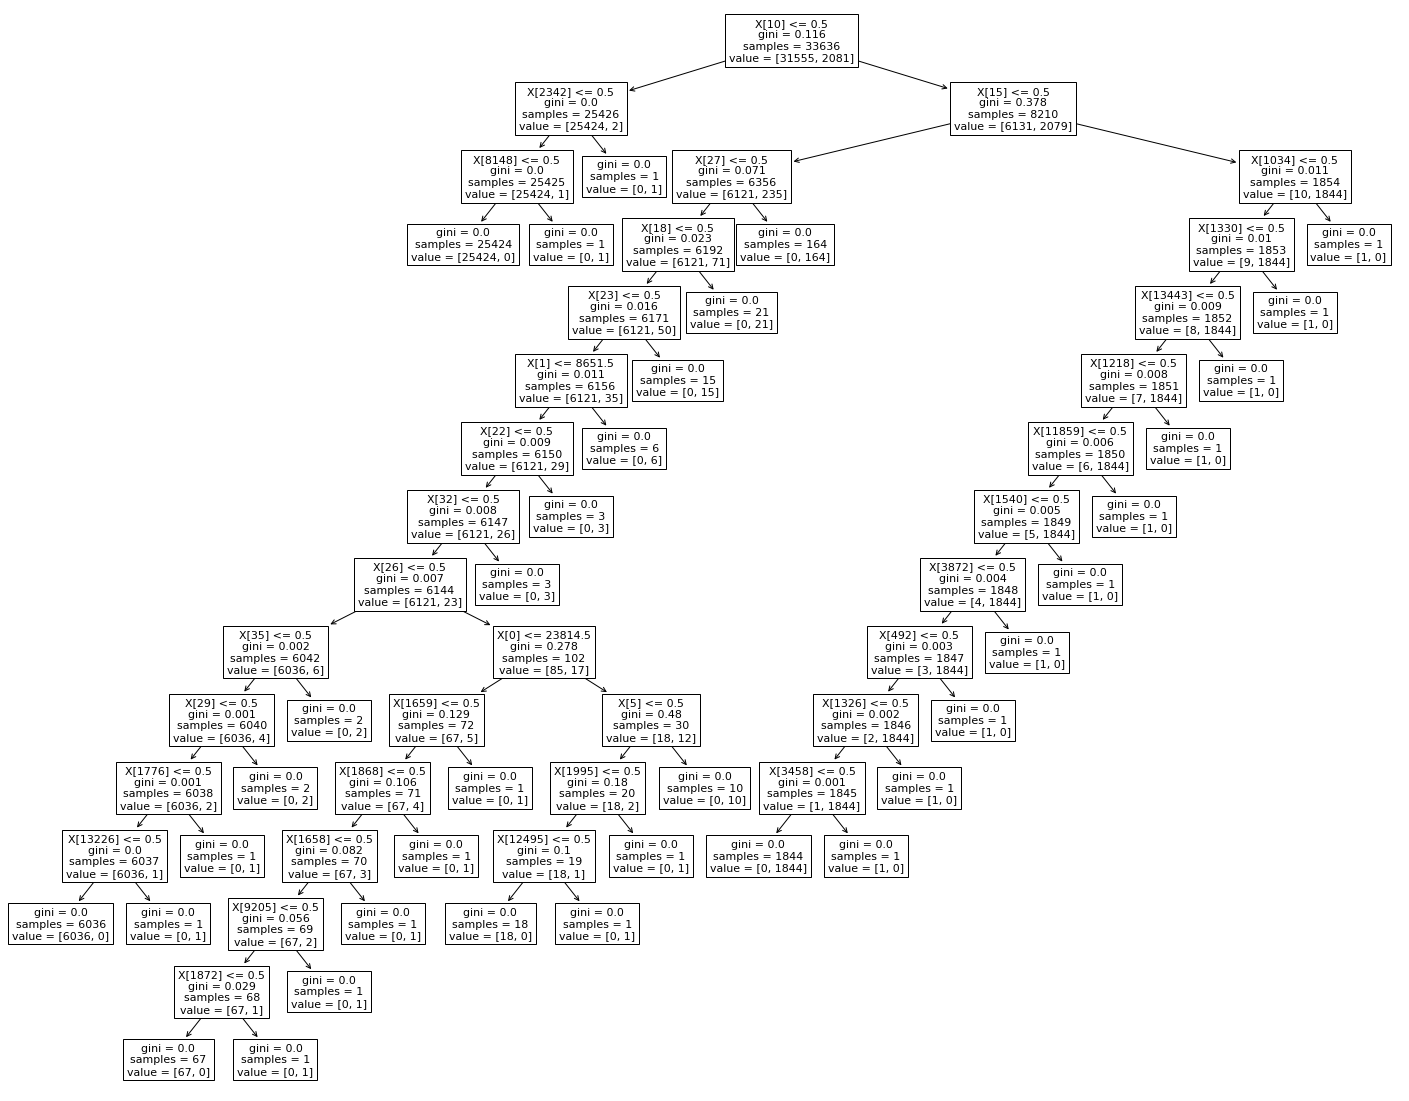

In [37]:
plt.figure(figsize=(25,20))
tree.plot_tree(classifier, fontsize=11);
plt.show()